In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload

%autoreload 2

%matplotlib notebook
sns.set()

In [2]:
import galsim
from mdetsims import Sim

In [3]:
lsst_sim = Sim(
    rng=np.random.RandomState(seed=100),
    g1=0.02,
    gal_type='wldeblend',
    scale=0.2,
    dim=300,
    buff=25,
    psf_type='gauss',
    n_coadd=300,
    n_coadd_psf=1,
    psf_kws={'fwhm': 0.7},
    gal_kws={'survey_name': 'LSST'})

erins_riz_lsst_sim = Sim(
    rng=np.random.RandomState(seed=100),
    g1=0.02,
    gal_type='wldeblend',
    scale=0.2,
    dim=300,
    buff=25,
    psf_type='wldeblend',
    n_coadd=1,
    n_coadd_psf=1,
    psf_kws={'fwhm': 0.7},
    gal_kws={'survey_name': 'LSST', 'use_wldeblend_depth': True})

erins_lsst_sim = Sim(
    rng=np.random.RandomState(seed=100),
    g1=0.02,
    gal_type='wldeblend',
    scale=0.2,
    dim=300,
    buff=25,
    psf_type='wldeblend',
    n_coadd=1,
    n_coadd_psf=1,
    psf_kws={'fwhm': 0.7},
    gal_kws={'survey_name': 'LSST', 'use_wldeblend_depth': True, 'bands': ('g', 'r', 'i')})

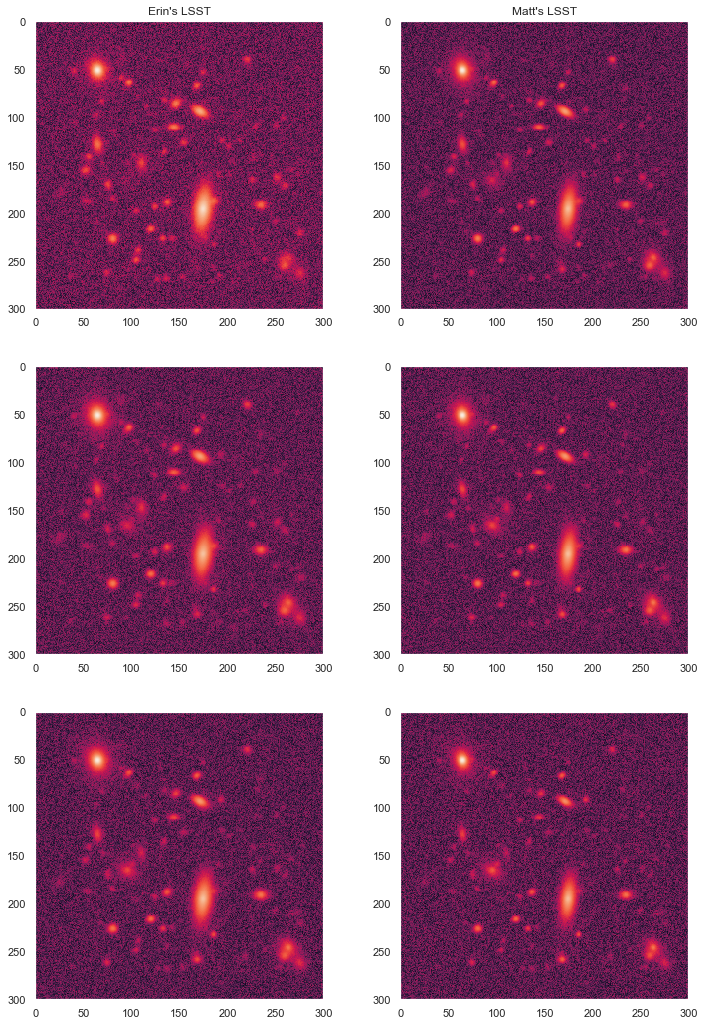

In [4]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))

erins_riz_lsst_mbobs = erins_riz_lsst_sim.get_mbobs()
erins_lsst_mbobs = erins_lsst_sim.get_mbobs()
lsst_mbobs = lsst_sim.get_mbobs()

for row in range(3):
    ax = axs[row, 0]
    ax.imshow(np.arcsinh(erins_lsst_mbobs[row][0].image/erins_lsst_sim.noise[row]))
    ax.grid(False)
    if row == 0:
        ax.set_title("Erin's LSST")

    ax = axs[row, 1]
    ax.imshow(np.arcsinh(lsst_mbobs[row][0].image/lsst_sim.noise[row]))
    ax.grid(False)
    if row == 0:
        ax.set_title("Matt's LSST")

In [5]:
erins_lsst_sim.noise

[152.62989174315575, 356.64837781856295, 423.6466640862634]

In [6]:
erins_riz_lsst_sim.noise

[356.64837781856295, 423.6466640862634, 500.5784387616878]

In [7]:
lsst_sim.noise

[322.0156441150757, 382.5079879722384, 484.68298919863156]

In [8]:
from mdetsims.metacal import MetacalPlusMOF
from mdetsims.defaults import TEST_METACAL_MOF_CONFIG

In [9]:
import logging
import sys

for lib in ['ngmix', 'metadetect', 'mdetsims']:
    lgr = logging.getLogger(lib)
    hdr = logging.StreamHandler(sys.stdout)
    hdr.setFormatter(logging.Formatter(logging.BASIC_FORMAT))
    lgr.setLevel(logging.DEBUG)
    lgr.addHandler(hdr)


In [10]:
lsst_mcal = MetacalPlusMOF(TEST_METACAL_MOF_CONFIG, lsst_mbobs, np.random.RandomState(seed=10))
lsst_mcal.go()

DEBUG:metadetect.detect:box sizes: [32 32 32 32 32 32 32 32 32 32 32 32 32 64 32 32 32 32 48 32 32 32 32 32
 48 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 48 32 32 32 32 32 48 64 32 32 32 32 32 32 48 32 48 32 32 32 32 32 32 32
 32 32 32 32 32 48 64 32 32 32 32 32 32 32 32 32 32 32 32 48 32 32 32 32
 32 32 32 32 48 32 64 32]
DEBUG:metadetect.detect:minmax: 32 64
DEBUG:mdetsims.metacal.mof_fitter:try: 1
DEBUG:mdetsims.metacal.base_fitter:guess[0]:  0.00133  0.000715  -0.000149   -0.0275      0.97     0.516       305       415       351 
DEBUG:mdetsims.metacal.base_fitter:guess[1]:  0.00137  5.34e-05    0.0113    0.0222     0.979     0.525       556       230       281 
INFO:mdetsims.metacal.mof_fitter:ntry: 1
DEBUG:mdetsims.metacal.mof_fitter:0 pars: 2.69e-06 -6.92e-06  -0.0761  -0.0949     0.28    0.383      419      567      387
DEBUG:mdetsims.metacal.mof_fitter:0 perr: 0.000998 0.000998    0.331    0.259    0.288    0.296      138      174      174
DEBUG:mde

DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 13.2189 Trat: 0.969302
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 23.236 Trat: 0.837568
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 141.683 Trat: 0.802187
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 16.5758 Trat: 0.153216
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 24.3458 Trat: 0.403156
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 115.401 Trat: 1.59094
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 7.73247 Trat: 1.96852
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 6.63374 Trat: -0.102036
DEBUG:mdetsims.metacal.mof_fitter:try: 1
DEBUG:mdetsims.metacal.base_fitter:guess[0]: -0.000494   0.00206   -0.0112    -0.033      1.01     0.521  1.45e+03  1.88e+03     2e+03 
INFO:mdetsims.metacal.mof_fitter:ntry: 1
DEBUG:mdetsims.metacal.mof_fitter:0 pars: 5.49e-06 4.15e-06   0.0083  -0.0359     2.18    0.852 2.69e+03 2.56e+03 2.45e+03
DEBUG:mdetsims.metacal.mof_fitter:0 perr: 0.000979 0.000979  

DEBUG:mdetsims.metacal.base_fitter:guess[2]: 0.000722  -0.00165   0.00705     0.035     0.978     0.471  2.92e+03  1.61e+03  1.88e+03 
DEBUG:mdetsims.metacal.base_fitter:guess[3]:  0.00107  0.000979     0.025   -0.0104     0.955     0.521  3.72e+03  2.32e+03  2.63e+03 
DEBUG:mdetsims.metacal.base_fitter:guess[4]: -0.000793    0.0026    0.0182    0.0252     0.965     0.474  6.09e+03  6.46e+03  8.29e+03 
INFO:mdetsims.metacal.mof_fitter:ntry: 1
DEBUG:mdetsims.metacal.mof_fitter:0 pars: 9.88e-06 -6.54e-06  -0.0356    0.209      2.9    0.426 1.51e+03      979      416
DEBUG:mdetsims.metacal.mof_fitter:0 perr: 0.000996 0.000996     0.19    0.135     2.45    0.245      432      342      315
DEBUG:mdetsims.metacal.mof_fitter:1 pars: -3.73e-06 1.25e-05   0.0207    0.137     0.42    0.833      864 1.24e+03 1.32e+03
DEBUG:mdetsims.metacal.mof_fitter:1 perr: 0.000996 0.000996    0.201    0.137    0.361    0.274      166      222      250
DEBUG:mdetsims.metacal.mof_fitter:2 pars:  1.5e-05 4.73e-05

DEBUG:mdetsims.metacal.base_fitter:guess[3]: 3.02e-05  0.000414   -0.0433   -0.0319      1.01     0.517  4.59e+03   7.7e+03  1.12e+04 
DEBUG:mdetsims.metacal.base_fitter:guess[4]: -0.00211  -0.000419    0.0485   0.00952     0.969     0.508       596       652       602 
DEBUG:mdetsims.metacal.base_fitter:guess[5]: 0.000751  -0.000614      0.03   -0.0343      1.01      0.48  3.49e+03  2.74e+03  3.65e+03 
DEBUG:mdetsims.metacal.base_fitter:guess[6]: -0.000581  -0.00179   -0.0228   0.00437      1.01     0.525  1.86e+03  1.67e+03   1.9e+03 
INFO:mdetsims.metacal.mof_fitter:ntry: 1
DEBUG:mdetsims.metacal.mof_fitter:0 pars: 1.59e-07  1.1e-06  -0.0606    0.115     2.33     0.55      902      722  1.1e+03
DEBUG:mdetsims.metacal.mof_fitter:0 perr:  0.00105  0.00105    0.275    0.184     3.05    0.289      400      360      514
DEBUG:mdetsims.metacal.mof_fitter:1 pars: -5.37e-05 -7.76e-05   0.0138  -0.0728   0.0427      0.5      722      745      763
DEBUG:mdetsims.metacal.mof_fitter:1 perr:  0.

DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 19.9524 Trat: 0.425541
DEBUG:mdetsims.metacal.mof_fitter:try: 1
DEBUG:mdetsims.metacal.base_fitter:guess[0]: 0.000326  -0.000596   -0.0157     0.021     0.979     0.511  1.32e+04  1.76e+04  1.48e+04 
DEBUG:mdetsims.metacal.base_fitter:guess[1]: 0.000973   0.00166   0.00309    0.0209     0.974      0.49  1.16e+03  1.02e+03  1.26e+03 
INFO:mdetsims.metacal.mof_fitter:ntry: 1
DEBUG:mdetsims.metacal.mof_fitter:0 pars: 0.000873 -0.00116    0.296   0.0119    0.762   0.0344 1.86e+04 3.06e+04 2.86e+04
DEBUG:mdetsims.metacal.mof_fitter:0 perr:  0.00091 0.000949  0.00604   0.0058   0.0209   0.0206      175      244      266
DEBUG:mdetsims.metacal.mof_fitter:1 pars: 1.61e-05 -3.85e-05   0.0844   -0.214    0.159    0.474 1.13e+03 1.16e+03 1.23e+03
DEBUG:mdetsims.metacal.mof_fitter:1 perr: 0.000991 0.000991    0.171    0.139   0.0759    0.285      121      135      161
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 270.253 Trat: 2.45287
DEBUG

INFO:mdetsims.metacal.mof_fitter:ntry: 1
DEBUG:mdetsims.metacal.mof_fitter:0 pars: -4.67e-06 2.41e-06   0.0192   0.0506    0.799    0.454      466      867      779
DEBUG:mdetsims.metacal.mof_fitter:0 perr: 0.000977 0.000977    0.287    0.182    0.832    0.282      189      299      302
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 7.87847 Trat: 1.35132
DEBUG:mdetsims.metacal.mof_fitter:try: 1
DEBUG:mdetsims.metacal.base_fitter:guess[0]: -0.000507  -0.00018    0.0323   -0.0328         1     0.517  1.05e+03  1.24e+03       994 
INFO:mdetsims.metacal.mof_fitter:ntry: 1
DEBUG:mdetsims.metacal.mof_fitter:0 pars: 5.74e-05 -2.97e-06   -0.248  -0.0915    0.491    0.365      912  1.8e+03 1.13e+03
DEBUG:mdetsims.metacal.mof_fitter:0 perr: 0.000994 0.000994    0.111    0.126    0.228    0.256      145      223      204
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 16.8612 Trat: 0.801537
DEBUG:mdetsims.metacal.mof_fitter:try: 1
DEBUG:mdetsims.metacal.base_fitter:guess[0]: 0.000132  -0

DEBUG:mdetsims.metacal.mof_fitter:1 pars: 1.65e-05 -5.04e-06    0.228    0.165    0.289    0.289 1.62e+03 1.52e+03  1.6e+03
DEBUG:mdetsims.metacal.mof_fitter:1 perr:  0.00099  0.00099    0.102    0.105    0.105    0.262      148      157      185
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 9.71789 Trat: 0.178162
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 24.1038 Trat: 1.29857


In [11]:
erins_lsst_mcal = MetacalPlusMOF(TEST_METACAL_MOF_CONFIG, erins_lsst_mbobs, np.random.RandomState(seed=10))
erins_lsst_mcal.go()

DEBUG:metadetect.detect:box sizes: [32 32 32 32 32 32 32 32 32 32 32 48 32 64 32 32 32 32 32 32 32 32 48 32
 64 32 32 32 32 48 32 32 32 32 32 32 32 32 32 32 32 32 32 64 32 32 32 32
 32 48 64 32 32 32 32 32 32 32 32 48 32 48 32 32 32 32 32 32 32 32 32 32
 48 64 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 48 64 32]
DEBUG:metadetect.detect:minmax: 32 64
DEBUG:mdetsims.metacal.mof_fitter:try: 1
DEBUG:mdetsims.metacal.base_fitter:guess[0]:  0.00133  0.000715  -0.000149   -0.0275      0.97     0.516       198       126       281 
INFO:mdetsims.metacal.mof_fitter:ntry: 1
DEBUG:mdetsims.metacal.mof_fitter:0 pars: -5.97e-06 8.15e-07   0.0389    0.017    0.618    0.576      256      154      281
DEBUG:mdetsims.metacal.mof_fitter:0 perr:  0.00099  0.00099    0.399    0.495      1.1    0.294      118      161      208
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 6.06201 Trat: 0.807687
DEBUG:mdetsims.metacal.mof_fitter:try: 1
DEBUG:mdetsims.metacal.base_fitter:guess[0]: -0.00031

DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 13.868 Trat: 0.757334
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 28.6596 Trat: 0.51169
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 149.644 Trat: 0.517757
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 18.1708 Trat: 0.116101
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 8.68118 Trat: -0.248012
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 28.6404 Trat: 0.319685
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 152.088 Trat: 1.10392
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 8.55746 Trat: 3.77361
DEBUG:mdetsims.metacal.mof_fitter:try: 1
DEBUG:mdetsims.metacal.base_fitter:guess[0]: -0.000494   0.00206   -0.0112    -0.033      1.01     0.521  1.03e+03  2.86e+03  2.96e+03 
INFO:mdetsims.metacal.mof_fitter:ntry: 1
DEBUG:mdetsims.metacal.mof_fitter:0 pars: -2.72e-06 7.26e-06 -0.00922   0.0392     2.31     0.89 1.63e+03 3.45e+03 3.43e+03
DEBUG:mdetsims.metacal.mof_fitter:0 perr: 0.000986 0.000986  

DEBUG:mdetsims.metacal.base_fitter:guess[2]: 0.000722  -0.00165   0.00705     0.035     0.978     0.471  1.93e+03     3e+03  3.32e+03 
DEBUG:mdetsims.metacal.base_fitter:guess[3]:  0.00107  0.000979     0.025   -0.0104     0.955     0.521  2.81e+03  3.97e+03   4.3e+03 
DEBUG:mdetsims.metacal.base_fitter:guess[4]: -0.000793    0.0026    0.0182    0.0252     0.965     0.474       287       775  1.94e+03 
INFO:mdetsims.metacal.mof_fitter:ntry: 1
DEBUG:mdetsims.metacal.mof_fitter:0 pars: -1.33e-05 1.23e-05   0.0145    0.169     8.32    0.568      999  2.1e+03 1.33e+03
DEBUG:mdetsims.metacal.mof_fitter:0 perr: 0.000997 0.000997    0.182    0.136     9.98    0.255      378      808      607
DEBUG:mdetsims.metacal.mof_fitter:1 pars: -0.000253 -0.000261   -0.337     0.14      1.6   0.0854 9.44e+03 2.25e+04 2.11e+04
DEBUG:mdetsims.metacal.mof_fitter:1 perr: 0.000987 0.000974  0.00911  0.00886   0.0749   0.0282      140      328      338
DEBUG:mdetsims.metacal.mof_fitter:2 pars: 5.87e-05 -5.5e-0

DEBUG:mdetsims.metacal.mof_fitter:0 perr:  0.00102  0.00102    0.163    0.303    0.217    0.298     81.2      159      220
DEBUG:mdetsims.metacal.mof_fitter:1 pars: 1.12e-05 8.93e-06 -0.00698  0.00598  -0.0021      0.5      248      277      378
DEBUG:mdetsims.metacal.mof_fitter:1 perr:  0.00102  0.00102     7.52     12.7   0.0663    0.306     55.6      107      130
DEBUG:mdetsims.metacal.mof_fitter:2 pars: -9.23e-05 -0.000132   -0.204    -0.13    0.672    0.388 2.18e+03 4.14e+03 3.23e+03
DEBUG:mdetsims.metacal.mof_fitter:2 perr:  0.00102  0.00102    0.053   0.0541    0.162    0.169      121      248      237
DEBUG:mdetsims.metacal.mof_fitter:3 pars: 3.71e-05 9.97e-05   0.0646   0.0301     0.47    0.329 1.42e+03 2.85e+03 2.08e+03
DEBUG:mdetsims.metacal.mof_fitter:3 perr:  0.00102  0.00102   0.0759   0.0804    0.149     0.23      106      226      215
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 12.4688 Trat: -0.170775
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 8.06237 T

INFO:mdetsims.metacal.mof_fitter:ntry: 1
DEBUG:mdetsims.metacal.mof_fitter:0 pars: 1.04e-05 5.01e-06   -0.219    0.212     10.3    0.579      932 1.73e+03 2.11e+03
DEBUG:mdetsims.metacal.mof_fitter:0 perr:    0.001    0.001    0.157    0.157     12.1    0.255      348      678      822
DEBUG:mdetsims.metacal.mof_fitter:1 pars: 8.34e-05 0.000131   0.0455   0.0195    0.319    0.137 5.87e+03 2.31e+04 2.28e+04
DEBUG:mdetsims.metacal.mof_fitter:1 perr: 0.000944 0.000948   0.0105   0.0105   0.0152   0.0563     74.2      217      233
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 10.26 Trat: 1.15139
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 257.963 Trat: 0.778417
DEBUG:mdetsims.metacal.mof_fitter:try: 1
DEBUG:mdetsims.metacal.base_fitter:guess[0]: -0.00111  -0.00109   0.00289   -0.0454     0.979     0.516       276       586   1.8e+03 
DEBUG:mdetsims.metacal.base_fitter:guess[1]: -0.000998  0.000167    0.0425   -0.0177     0.969     0.525  1.31e+03  1.61e+03  2.29e+03 
INFO:mde

DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 14.9615 Trat: 0.206369
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 10.3219 Trat: 1.81795
DEBUG:mdetsims.metacal.mof_fitter:try: 1
DEBUG:mdetsims.metacal.base_fitter:guess[0]:  0.00159  -0.000108   0.00946  -0.00656     0.989     0.476       480       851       610 
DEBUG:mdetsims.metacal.base_fitter:guess[1]:  -0.0017  -0.000282  -0.000294   0.00805      1.04     0.499       483  4.72e+03  8.25e+03 
DEBUG:mdetsims.metacal.base_fitter:guess[2]: 0.000802  0.000132    0.0445    0.0425      1.03     0.481       675  1.77e+03  1.75e+03 
DEBUG:mdetsims.metacal.base_fitter:guess[3]: 0.000621   0.00031   -0.0414  -0.00579     0.994     0.499       720  1.23e+03       597 
DEBUG:mdetsims.metacal.base_fitter:guess[4]: 0.000164  -0.000672   -0.0188    0.0302      1.04     0.527       393       676       217 
DEBUG:mdetsims.metacal.base_fitter:guess[5]:  0.00013  -2.21e-05   -0.0324   -0.0432     0.994     0.486       255       843       

In [12]:
erins_riz_lsst_mcal = MetacalPlusMOF(TEST_METACAL_MOF_CONFIG, erins_riz_lsst_mbobs, np.random.RandomState(seed=10))
erins_riz_lsst_mcal.go()

DEBUG:metadetect.detect:box sizes: [32 32 32 32 32 32 32 32 32 32 32 64 48 32 32 32 32 32 32 32 32 48 32 32
 64 32 32 48 32 32 32 32 32 32 32 32 32 32 32 32 32 32 48 32 32 32 32 32
 32 32 32 48 64 32 32 32 32 32 32 48 32 32 48 32 32 32 32 32 32 32 32 32
 32 48 64 32 32 32 32 32 32 32 32 32 32 32 32 32 48 32 32 32 32 32 64 32
 64 32]
DEBUG:metadetect.detect:minmax: 32 64
DEBUG:mdetsims.metacal.mof_fitter:try: 1
DEBUG:mdetsims.metacal.base_fitter:guess[0]:  0.00133  0.000715  -0.000149   -0.0275      0.97     0.516       417       512       405 
DEBUG:mdetsims.metacal.base_fitter:guess[1]:  0.00137  5.34e-05    0.0113    0.0222     0.979     0.525       786       299       331 
INFO:mdetsims.metacal.mof_fitter:ntry: 1
DEBUG:mdetsims.metacal.mof_fitter:0 pars: 8.36e-06 -4.31e-07   -0.071  -0.0813    0.247    0.425      501      627      396
DEBUG:mdetsims.metacal.mof_fitter:0 perr: 0.000999 0.000999    0.419    0.343    0.315    0.298      170      205      194
DEBUG:mdetsims.metacal.mof_

DEBUG:mdetsims.metacal.mof_fitter:try: 1
DEBUG:mdetsims.metacal.base_fitter:guess[0]: 0.000288   0.00157    0.0307    0.0398      1.03     0.489  2.24e+03  2.21e+03  2.35e+03 
INFO:mdetsims.metacal.mof_fitter:ntry: 1
DEBUG:mdetsims.metacal.mof_fitter:0 pars: 4.46e-05 -1.33e-05   0.0864  -0.0177    0.798    0.543 2.67e+03 2.53e+03 2.16e+03
DEBUG:mdetsims.metacal.mof_fitter:0 perr: 0.000975 0.000975    0.103    0.121    0.461    0.246      363      363      345
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 22.3134 Trat: 0.938703
DEBUG:mdetsims.metacal.mof_fitter:try: 1
DEBUG:mdetsims.metacal.base_fitter:guess[0]: -8.56e-05   -0.0002    0.0343    0.0126         1     0.525  2.91e+05  3.22e+05  3.29e+05 
INFO:mdetsims.metacal.mof_fitter:ntry: 1
DEBUG:mdetsims.metacal.mof_fitter:0 pars: 0.000415  -0.0084   -0.142   0.0716     1.91      1.1 3.65e+05 4.23e+05 3.26e+05
DEBUG:mdetsims.metacal.mof_fitter:0 perr: 0.000232 0.000212 0.000981 0.000975   0.0183  0.00346      484      564      4

DEBUG:mdetsims.metacal.mof_fitter:1 pars: -0.000109 -0.000158   -0.338    0.141      1.6   0.0839 2.24e+04 2.14e+04 1.71e+04
DEBUG:mdetsims.metacal.mof_fitter:1 perr:  0.00099 0.000979   0.0103     0.01   0.0822   0.0308      340      354      349
DEBUG:mdetsims.metacal.mof_fitter:2 pars: 2.35e-06 2.41e-06  -0.0472   0.0939    0.251     0.38 3.35e+03 2.37e+03 1.69e+03
DEBUG:mdetsims.metacal.mof_fitter:2 perr: 0.000997 0.000997   0.0957   0.0894   0.0775     0.26      207      191      192
DEBUG:mdetsims.metacal.mof_fitter:3 pars: 0.000147 -1.31e-05   0.0274   -0.159    0.684    0.274 5.78e+03 4.85e+03 3.23e+03
DEBUG:mdetsims.metacal.mof_fitter:3 perr: 0.000996 0.000996   0.0462   0.0452    0.142    0.152      280      269      255
DEBUG:mdetsims.metacal.mof_fitter:4 pars: 1.33e-05 8.26e-06   0.0854   0.0939    0.579    0.812 1.04e+03 1.55e+03 1.53e+03
DEBUG:mdetsims.metacal.mof_fitter:4 perr: 0.000998 0.000998    0.192    0.184    0.505     0.28      221      299      313
DEBUG:mdetsim

DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 9.77798 Trat: 3.47488
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 13.8569 Trat: 0.33259
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 31.2241 Trat: 0.504574
DEBUG:mdetsims.metacal.mof_fitter:try: 1
DEBUG:mdetsims.metacal.base_fitter:guess[0]: 0.000638  -0.00013   -0.0359   -0.0118     0.987     0.478       744  1.31e+03       281 
INFO:mdetsims.metacal.mof_fitter:ntry: 1
DEBUG:mdetsims.metacal.mof_fitter:0 pars: -8.88e-06 -9.06e-07  -0.0461   0.0498   0.0503    0.489      466      830      219
DEBUG:mdetsims.metacal.mof_fitter:0 perr:    0.001    0.001     0.65    0.606   0.0914      0.3      120      163      144
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 10.5215 Trat: 0.126958
DEBUG:mdetsims.metacal.mof_fitter:try: 1
DEBUG:mdetsims.metacal.base_fitter:guess[0]: -0.000982  0.000898  -0.00891    0.0352      1.03      0.52  1.37e+03       673   1.1e+03 
DEBUG:mdetsims.metacal.base_fitter:guess[1]:  0.00108   0.00

DEBUG:mdetsims.metacal.mof_fitter:0 perr: 0.000999 0.000999    0.197    0.444    0.412    0.296      202      196      227
DEBUG:mdetsims.metacal.mof_fitter:1 pars:  5.7e-07 1.19e-06   0.0683    0.123    0.152    0.477      686      935      774
DEBUG:mdetsims.metacal.mof_fitter:1 perr: 0.000999 0.000999    0.367    0.219    0.145    0.297      148      184      190
DEBUG:mdetsims.metacal.mof_fitter:2 pars: 0.000174 0.000138   0.0352    0.025    0.328    0.151 2.32e+04 2.34e+04 1.62e+04
DEBUG:mdetsims.metacal.mof_fitter:2 perr: 0.000942 0.000945   0.0104   0.0105   0.0152   0.0545      209      228      217
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 7.8414 Trat: 0.493013
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 9.20967 Trat: -0.129723
DEBUG:mdetsims.metacal.metacal_fitter:    mcal s2n: 255.607 Trat: 0.860831
DEBUG:mdetsims.metacal.mof_fitter:try: 1
DEBUG:mdetsims.metacal.base_fitter:guess[0]: -0.00155   0.00111    0.0466   0.00858     0.966     0.522       803      

DEBUG:mdetsims.metacal.base_fitter:guess[2]: 0.000794  0.000996    0.0212  -0.00476     0.992     0.508       833       411       733 
DEBUG:mdetsims.metacal.base_fitter:guess[3]:  0.00117  0.000527    0.0117   -0.0444      1.03     0.481       796       697       239 
DEBUG:mdetsims.metacal.base_fitter:guess[4]: -0.00145  -0.000126   -0.0293   0.00332      1.01     0.501     5e+03  9.94e+03  1.25e+04 
DEBUG:mdetsims.metacal.base_fitter:guess[5]:  0.00183  -0.00235    0.0128   0.00991     0.977     0.516  1.89e+03  1.15e+03  1.66e+03 
DEBUG:mdetsims.metacal.base_fitter:guess[6]: -0.000393   0.00118     -0.03    0.0332      1.01     0.495       521       834       152 
DEBUG:mdetsims.metacal.base_fitter:guess[7]: -0.000847  -0.000527  -0.000415    0.0071      1.01     0.504       541       519        77 
INFO:mdetsims.metacal.mof_fitter:ntry: 1
DEBUG:mdetsims.metacal.mof_fitter:0 pars: -2.43e-06 1.05e-05   0.0156    0.284    0.286    0.395      914      691      471
DEBUG:mdetsims.metac

In [13]:
d = lsst_mcal.result['mof']
ed = erins_lsst_mcal.result['mof']
erizd = erins_riz_lsst_mcal.result['mof']

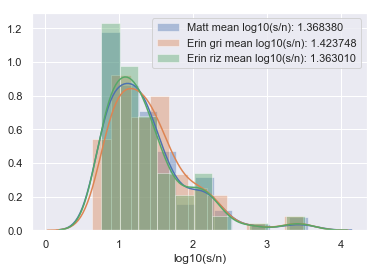

In [15]:
plt.figure()
sns.distplot(np.log10(d['bdf_s2n']), label='Matt mean log10(s/n): %f' % np.mean(np.log10(d['bdf_s2n'])))
sns.distplot(np.log10(ed['bdf_s2n']), label='Erin gri mean log10(s/n): %f' % np.mean(np.log10(ed['bdf_s2n'])))
sns.distplot(np.log10(erizd['bdf_s2n']), label='Erin riz mean log10(s/n): %f' % np.mean(np.log10(erizd['bdf_s2n'])))
plt.xlabel('log10(s/n)')
plt.legend()

In [ ]:
import os
os.environ['CATSIM_DIR'] = '/Users/Matt/CATSIM_DIR'

des_sim = Sim(
    rng=np.random.RandomState(seed=100),
    g1=0.02,
    gal_type='wldeblend',
    scale=0.263,
    psf_type='ps',
    n_coadd=10 * 3,
    n_coadd_psf=10,
    psf_kws={'trunc': 1, 'median_seeing': 0.8},
    gal_kws={'survey_name': 'DES'})

lsst_sim = Sim(
    rng=np.random.RandomState(seed=100),
    g1=0.02,
    gal_type='wldeblend',
    scale=0.2,
    # we have to adjust these so we get a patch that is the same size in LSST
    # in order to compare the simulations
    dim=300,
    buff=25,
    psf_type='ps',
    n_coadd=1,
    n_coadd_psf=1,
    psf_kws={'trunc': 1, 'median_seeing': 0.6},
    gal_kws={'survey_name': 'LSST'})

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))

des_mbobs = des_sim.get_mbobs()
lsst_mbobs = lsst_sim.get_mbobs()

ax = axs[0, 0]
ax.imshow(np.arcsinh(des_mbobs[0][0].image/des_sim.noise))
ax.grid(False)
ax.set_title('DES')

ax = axs[0, 1]
ax.imshow(np.arcsinh(lsst_mbobs[0][0].image/lsst_sim.noise))
ax.grid(False)
ax.set_title('LSST')

ax = axs[1, 0]
ax.imshow(des_mbobs[0][0].noise)
ax.grid(False)

ax = axs[1, 1]
ax.imshow(lsst_mbobs[0][0].noise)
ax.grid(False)

ax = axs[2, 0]
ax.imshow(des_mbobs[0][0].bmask)
ax.grid(False)

ax = axs[2, 1]
ax.imshow(lsst_mbobs[0][0].bmask)
ax.grid(False)

In [ ]:
psf_obs1 = sim.get_psf_obs(x=0, y=30)
psf_obs2 = sim.get_psf_obs(x=10, y=120)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

sns.heatmap(psf_obs1.image, square=True, ax=axs[0])

sns.heatmap((psf_obs2.image - psf_obs1.image) / np.max(psf_obs1.image), square=True, ax=axs[1])

In [ ]:
from mdetsims.masking import generate_bad_columns, generate_cosmic_rays

fig, axs = plt.subplots(nrows=3, ncols=3, sharex='all', sharey='all', figsize=(10, 10))

for ax in axs.ravel():
    msk = np.zeros((225, 225)).astype(bool)
    msk |= generate_cosmic_rays(msk.shape)
    msk |= generate_bad_columns(msk.shape)
    ax.imshow(1-msk, vmin=0, vmax=1)
    ax.grid(False)

In [ ]:
des_sim.nobj

In [ ]:
lsst_sim.nobj

In [ ]:
import galsim

p0 = des_sim._psfs[0].getPSF(galsim.PositionD(x=10, y=10))
p1 = des_sim._psfs[1].getPSF(galsim.PositionD(x=10, y=10))

In [ ]:
p0im = p0.drawImage(scale=0.263)

In [ ]:
p = galsim.Sum([p.getPSF(galsim.PositionD(x=10, y=10)) for p in des_sim._psfs])

In [ ]:
pim = p.drawImage(scale=0.263)

In [ ]:
galsim.hsm.FindAdaptiveMom(p0im)

In [ ]:
galsim.hsm.FindAdaptiveMom(pim)

In [ ]:
from mdetsims.metacal import MetacalPlusMOF
from mdetsims.defaults import TEST_METACAL_MOF_CONFIG

In [ ]:
lsst_mbobs = lsst_sim.get_mbobs()

In [ ]:
mcal = MetacalPlusMOF(TEST_METACAL_MOF_CONFIG, lsst_mbobs, np.random.RandomState(seed=10))

In [ ]:
mcal.go()

In [ ]:
cat = mcal.result

In [ ]:
cat.keys()

In [ ]:
d = cat['mof']

In [ ]:
d.dtype

In [ ]:
msk = d['flags'] == 0